In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
df=pd.read_csv(r"C:\Users\Pavan\OneDrive\Documents\cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

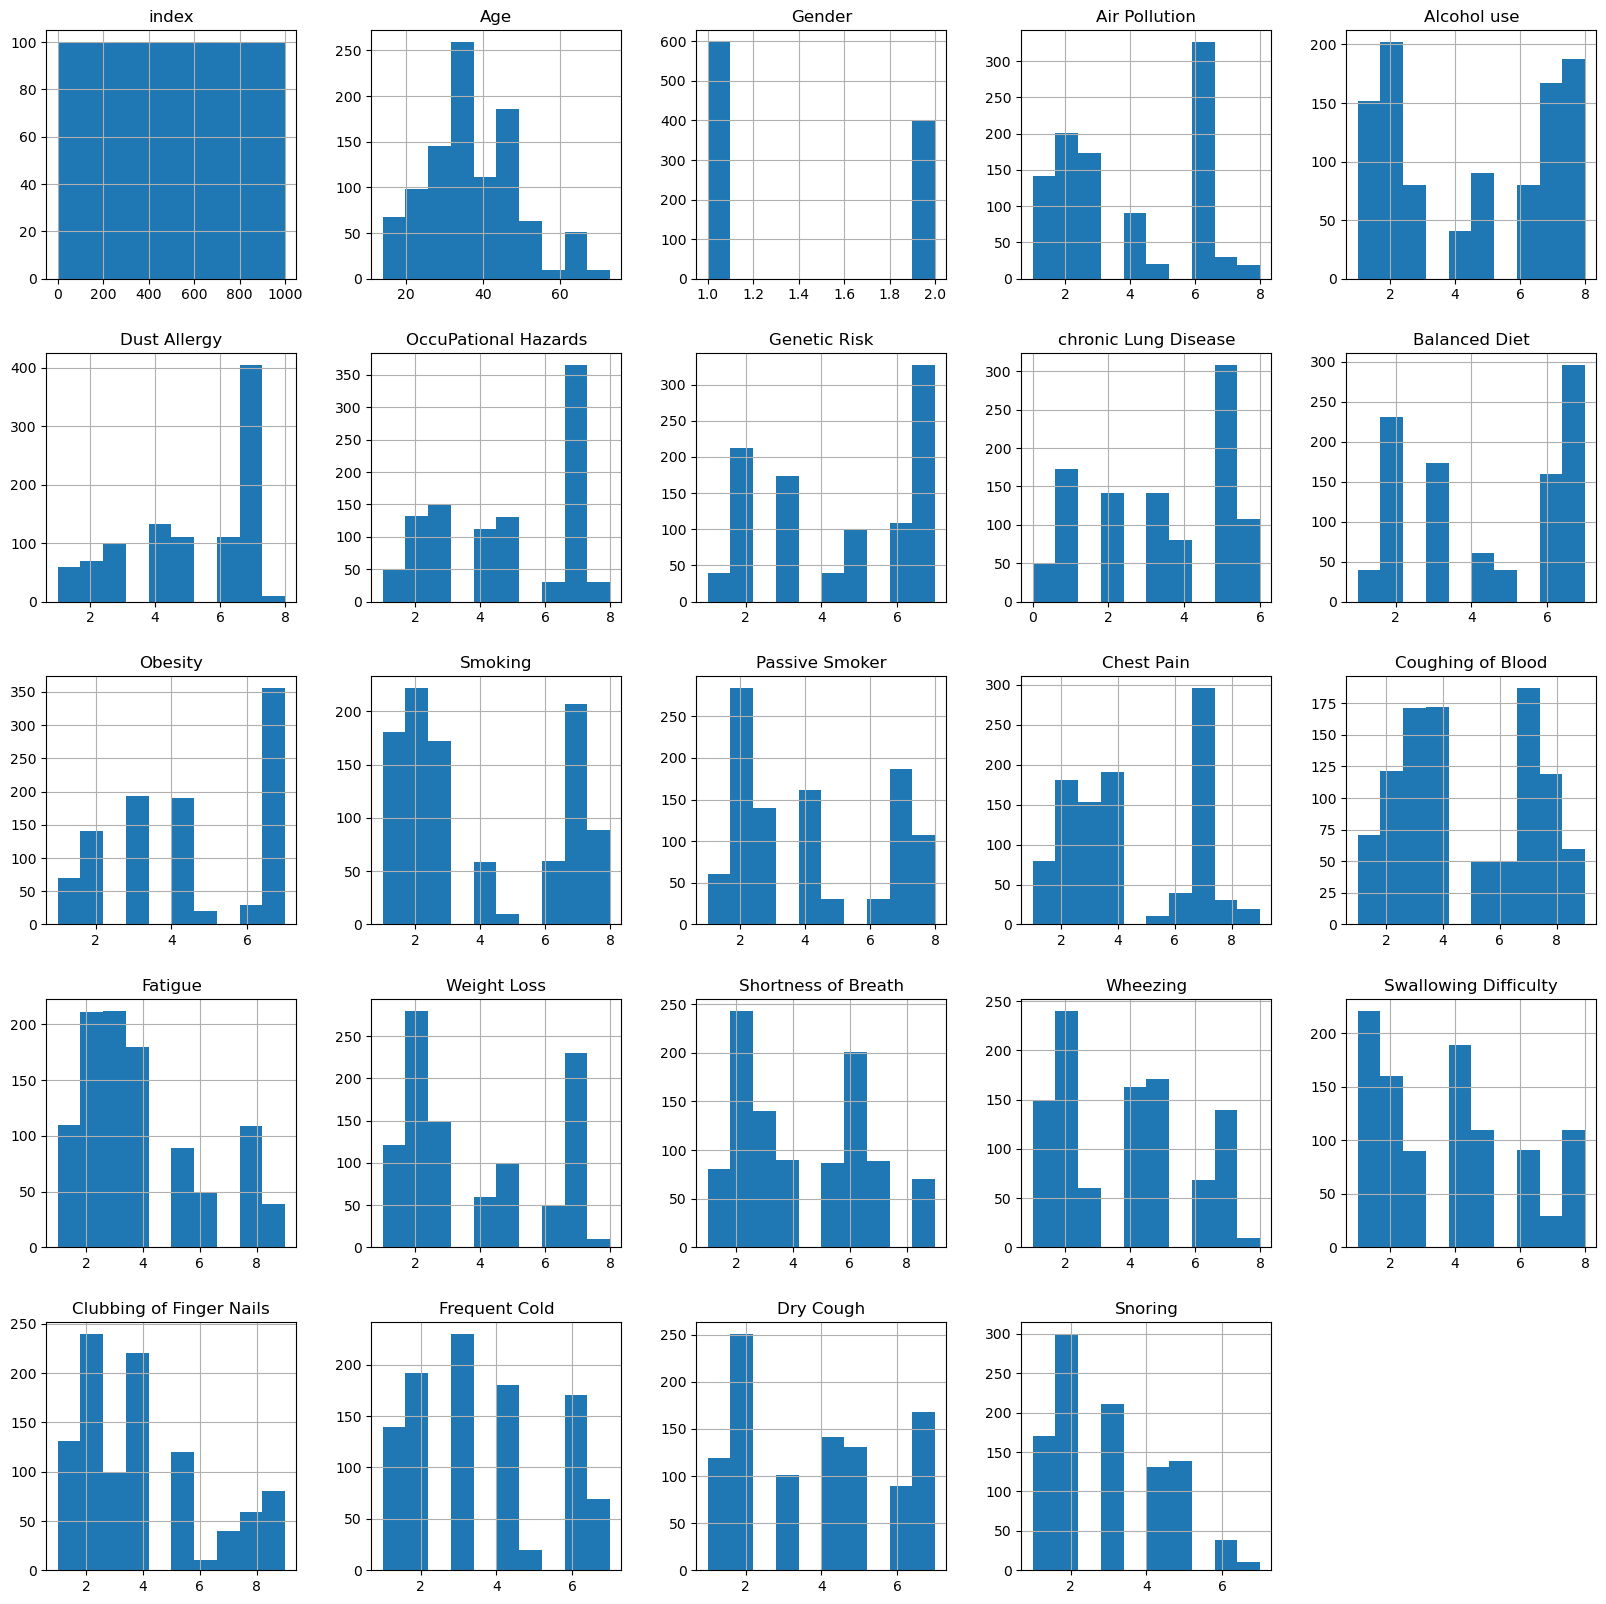

NameError: name 'Y' is not defined

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv(r"C:\Users\Pavan\OneDrive\Documents\cancer patient data sets.csv")
df.head()

df.info()

df.columns

df.describe()

df.describe().T

df.isnull().sum()
df.head()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["chronic Lung Disease"]=le.fit_transform(df[["chronic Lung Disease"]])
df

df.hist(figsize=(20,20))
sns.boxplot(df['Age'])
plt.show()

X=df.drop(["chronic Lung Disease"],axis=1)
y=df['chronic Lung Disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
Y

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
ypred_train=dtree.predict(X_train)
ypred_test=dtree.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
scores= cross_val_score(dtree,X,y,cv=5)
print(scores)
scores.mean()

from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier(random_state=0)
param_grid={"criterion":["gini","entropy"],"max_depth":[1,2,3,4]}
grid= GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(X_train,y_train)
grid.best_params_

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dtree.fit(X_train, y_train)
ypred_train=dtree.predict(X_train)
ypred_test=dtree.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
scores= cross_val_score(dtree,X,y,cv=5)
print(scores)
scores.mean()

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_train=rfc.predict(X_train)
ypred_test=rfc.predict(X_test)
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=0)
param_grid={"n_estimators":list(range(1,51))}
grid= GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(X_train,y_train)
grid.best_params_

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=36)
rfc.fit(X_train, y_train)
ypred_train=rfc.predict(X_train)
ypred_test=rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rfc,X,y,cv=5)
print(scores)
scores.mean()
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
model=SVC()
model.fit(X_train,y_train)
ypred_train=rfc.predict(X_train)
ypred_test=rfc.predict(X_test)
from sklearn import svm
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,X,y,cv=5)
print(scores)
scores.mean()

from sklearn.model_selection import GridSearchCV

estimator=SVC(random_state=0)

param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

grid= GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

from sklearn import svm

model=SVC(C=10,kernel='linear')

model.fit(X_train, y_train)

ypred_train=rfc.predict(X_train)

ypred_test=rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,ypred_train))

print(accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score

scores= cross_val_score(model,X,y,cv=5)
print(scores)
scores.mean()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
feature_coefficients = log_model.coef_[0]
sorted_coefficients = sorted(zip(X.columns, feature_coefficients), key=lambda x: abs(x[1]), reverse=True)
for feature, coefficient in sorted_coefficients:
    print(f'{feature}: {coefficient}')
feature_coefficients = log_model.coef_[0]
plt.bar(X.columns, feature_coefficients)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# load data
df = pd.read_csv("C:\\Users\\kavya\\Downloads\\CANCER PREDICTION.csv")

# separate features and target
X=df.drop(["LUNG_CANCER"],axis=1)
y=df['LUNG_CANCER']
# feature selection using statistical methods
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
# print selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
 
models = ['dtree', 'Log_model', 'rfc','SVM','KNN']
accuracy = [0.88, 0.91,0.88,0.87,0.83]
 
plt.bar(models, accuracy, color ='blue', width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Lung Cancer Prediction Models")
plt.show()
